# part 1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os


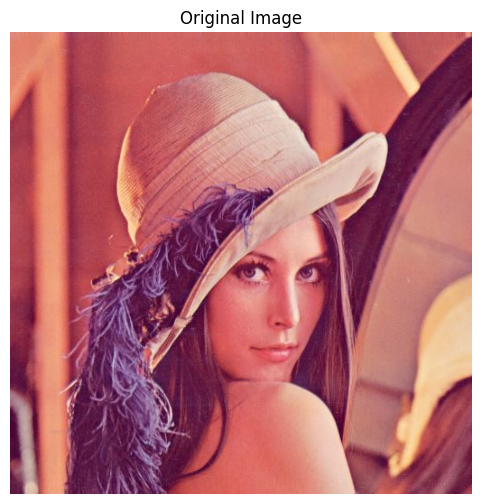

In [ ]:
# Load the image using OpenCV
image_path = "/content/cv_image.jpg"  # Change this to your image file
original_image = cv2.imread(image_path)

# Convert BGR to RGB (OpenCV loads images in BGR format)
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

# Display the original image
plt.figure(figsize=(6, 6))
plt.imshow(original_image)
plt.title("Original Image")
plt.axis("off")
plt.show()


In [ ]:
# Convert image to PIL format for compression
pil_image = Image.fromarray(original_image)

# Save with different JPEG quality levels
jpeg_quality = [90, 75, 50, 10]  # Higher means better quality, lower means more compression
jpeg_filenames = []

for quality in jpeg_quality:
    filename = f"compressed_{quality}.jpg"
    pil_image.save(filename, "JPEG", quality=quality)
    jpeg_filenames.append(filename)

print("JPEG Compression completed!")


JPEG Compression completed!


In [ ]:
# Compare file sizes
original_size = os.path.getsize(image_path) / 1024  # Convert bytes to KB
compressed_sizes = [os.path.getsize(f) / 1024 for f in jpeg_filenames]

print(f"Original Image Size: {original_size:.2f} KB")
for i, quality in enumerate(jpeg_quality):
    print(f"JPEG Quality {quality}: {compressed_sizes[i]:.2f} KB")


Original Image Size: 41.05 KB
JPEG Quality 90: 59.17 KB
JPEG Quality 75: 40.95 KB
JPEG Quality 50: 22.12 KB
JPEG Quality 10: 9.39 KB


In [ ]:
# Save as PNG (lossless)
png_filename = "compressed.png"
pil_image.save(png_filename, "PNG")

# Compare file sizes
png_size = os.path.getsize(png_filename) / 1024
print(f"PNG (Lossless) Image Size: {png_size:.2f} KB")


PNG (Lossless) Image Size: 364.13 KB


['.config', 'cv_image.jpg', 'compressed_90.jpg', 'compressed_50.jpg', 'compressed_10.jpg', 'compressed_75.jpg', 'compressed.png', 'sample_data']


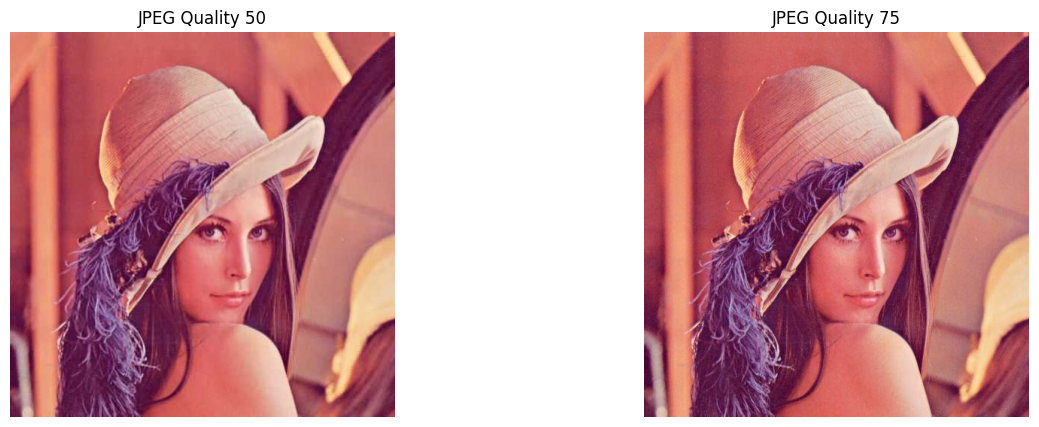

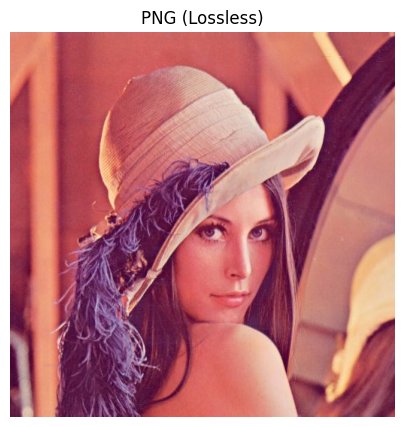

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

print(os.listdir())  # List files in the current directory
# Function to display images
def show_images(filenames, titles):
    num_images = len(filenames)

    # Create subplots
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))

    # If only one image, make axes a list for consistency
    if num_images == 1:
        axes = [axes]  # Convert single Axes object to a list

    # Iterate through images and titles
    for ax, file, title in zip(axes, filenames, titles):
        img = Image.open(file)
        ax.imshow(img)
        ax.set_title(title)
        ax.axis("off")

    plt.show()

# Example usage
jpeg_filenames = ["/content/compressed_50.jpg", "/content/compressed_75.jpg"]
png_filename = "compressed.png"

# Show JPEG Compressed Images
show_images(jpeg_filenames, [f"JPEG Quality {q}" for q in [50, 75]])

# Show PNG Compressed Image (Fixed Issue)
show_images([png_filename], ["PNG (Lossless)"])


# part 2

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize pixel values (scale to range 0-1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot encoding
y_train_ohe = keras.utils.to_categorical(y_train, 10)
y_test_ohe = keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Define CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for CIFAR-10
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train model (80-20 split)
history = model.fit(x_train, y_train_ohe, epochs=50, batch_size=64,
                    validation_data=(x_test, y_test_ohe))

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 110ms/step - accuracy: 0.3258 - loss: 1.8131 - val_accuracy: 0.5447 - val_loss: 1.2796
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 128s 92ms/step - accuracy: 0.5749 - loss: 1.1954 - val_accuracy: 0.6049 - val_loss: 1.1101
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 88ms/step - accuracy: 0.6484 - loss: 0.9961 - val_accuracy: 0.6263 - val_loss: 1.0527
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.6916 - loss: 0.8780 - val_accuracy: 0.6849 - val_loss: 0.9077
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.7283 - loss: 0.7807 - val_accuracy: 0.6873 - val_loss: 0.8827
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 88ms/step - accuracy: 0.7526 - loss: 0.7086 - val_accuracy: 0.7156 - val_loss: 0.8324
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 90ms/step - accuracy: 0.7740 - loss: 0.6450 - val_accuracy: 0.7294 - val_loss: 0.8035
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 89ms/step - accuracy: 0.7964 - loss: 0.5871 

In [ ]:
# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test_ohe, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 - 4s - 12ms/step - accuracy: 0.6937 - loss: 3.0412
Test Accuracy: 0.6937


In [ ]:

# Predict probabilities
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


In [ ]:
# Classification report
print(classification_report(y_test, y_pred, target_names=[
      'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']))

              precision    recall  f1-score   support

    airplane       0.70      0.76      0.73      1000
  automobile       0.85      0.79      0.82      1000
        bird       0.63      0.54      0.58      1000
         cat       0.49      0.49      0.49      1000
        deer       0.66      0.65      0.66      1000
         dog       0.55      0.65      0.60      1000
        frog       0.75      0.77      0.76      1000
       horse       0.71      0.75      0.73      1000
        ship       0.83      0.77      0.80      1000
       truck       0.79      0.77      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



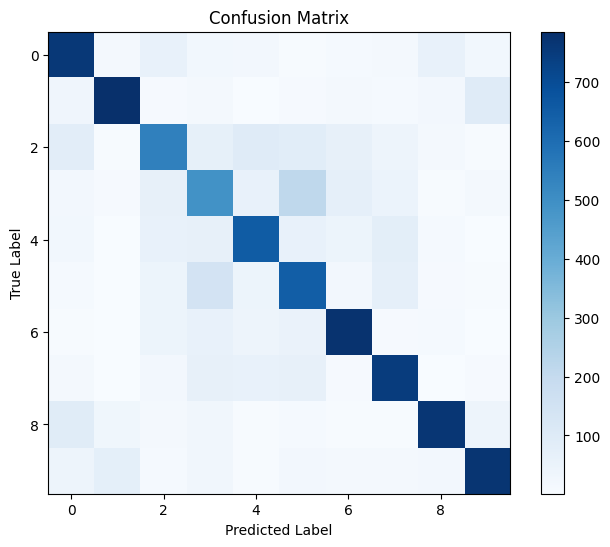

In [ ]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

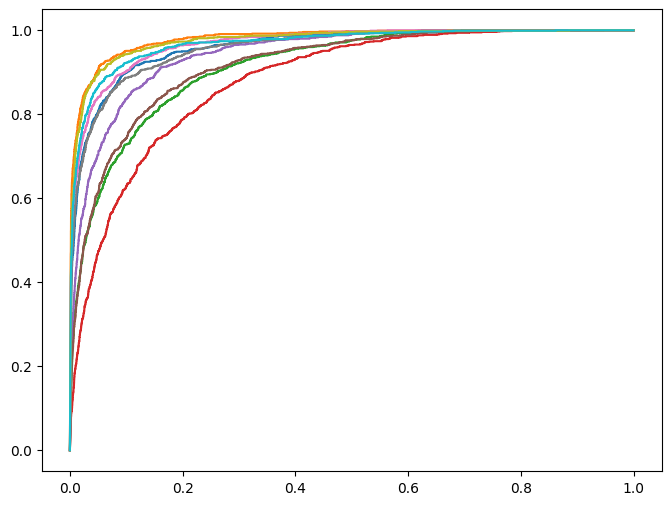

In [ ]:
# ROC & AUC (For each class)
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_ohe[:, i], y_pred_probs[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

<ipython-input-11-1f77c258a88b>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


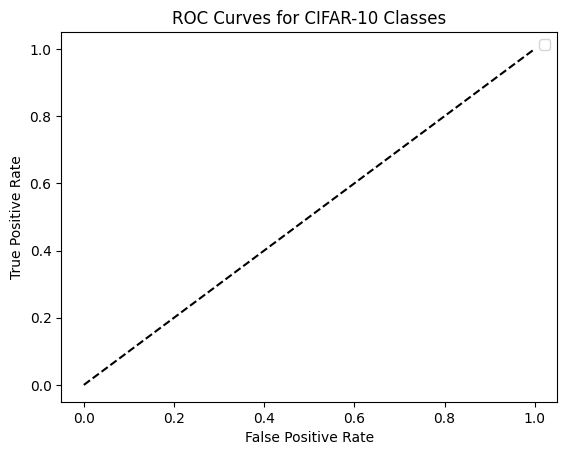

In [ ]:

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for CIFAR-10 Classes")
plt.legend()
plt.show()